Time taken to download dataset: 15.22 seconds
Time taken to load dataset: 2.86 seconds


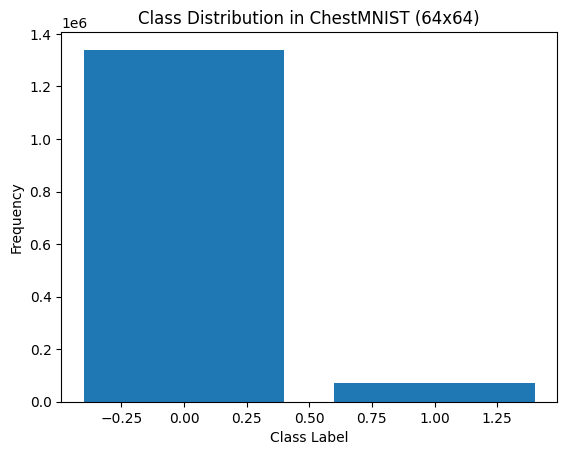

Time taken for class distribution analysis: 0.31 seconds
Total time taken: 19.24 seconds


In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from google.cloud import storage

start_time = time.time()

client = storage.Client()
bucket_name = 'marketplace-p115jwl6'
bucket = client.get_bucket(bucket_name)

download_start = time.time()
blob = bucket.blob('MedMNIST/120/artifactFiles/chestmnist_64.npz')
blob.download_to_filename('/tmp/chestmnist_64.npz')
download_end = time.time()
print(f"Time taken to download dataset: {download_end - download_start:.2f} seconds")

load_start = time.time()
data = np.load('/tmp/chestmnist_64.npz')
train_images, train_labels = data['train_images'], data['train_labels']
test_images, test_labels = data['test_images'], data['test_labels']
load_end = time.time()
print(f"Time taken to load dataset: {load_end - load_start:.2f} seconds")

analysis_start = time.time()
all_labels = np.concatenate((train_labels, test_labels))
label_counter = Counter(all_labels.flatten())

plt.bar(label_counter.keys(), label_counter.values())
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Distribution in ChestMNIST (64x64)')
plt.show()

analysis_end = time.time()
print(f"Time taken for class distribution analysis: {analysis_end - analysis_start:.2f} seconds")

end_time = time.time()
print(f"Total time taken: {end_time - start_time:.2f} seconds")
